In [2]:
import os
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from numpy import *
import statsmodels.api as sm
os.getcwd()
os.chdir(r'C:\Users\thecat\Desktop\元码时用的一些程序\数据\分析数据')

In [3]:
data1 = pd.read_csv(r'data_old.csv',header=0,index_col = 0)
x = data1.iloc[:,1:]
y = data1.iloc[:,0]
print(x.head())
y.value_counts() 

              hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3   hsa-let-7b  \
ID                                                                    
TCGA-A7-A4SE   6015.451673   5946.436756   6158.709909  14372.18211   
TCGA-4H-AAAK  14576.349860  14567.992760  14659.398540  22130.47209   
TCGA-HN-A2NL  19718.888560  19635.641270  19742.469340  30824.00523   
TCGA-AR-A1AY  10576.064280  10481.802530  10716.154950  26050.09413   
TCGA-A2-A3XW  16416.936080  16334.500070  16431.861820  28592.43614   

               hsa-let-7c   hsa-let-7d   hsa-let-7e  hsa-let-7f-1  \
ID                                                                  
TCGA-A7-A4SE  2234.270786   592.552315   730.582148   1977.033369   
TCGA-4H-AAAK  3240.987956   355.002656  1670.201314   4116.045998   
TCGA-HN-A2NL  1575.267338  1329.098321   796.387139  10425.561560   
TCGA-AR-A1AY  4712.566758   731.700331  1059.272935   3396.547728   
TCGA-A2-A3XW  8117.076585   328.595904   920.573709   4035.920056   

              hsa-

0    432
1     51
Name: label, dtype: int64

In [4]:
xtrain,  xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, stratify=y,random_state=18)
xtrain.shape

(338, 126281)

In [5]:
dict= {}
list = []
for i in range(len(xtrain)):
    y = ytrain
    x = xtrain.iloc[:,i:i+1]
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    #print(model.summary())
    P = model.f_pvalue
    fea = x.columns.tolist()
    if P <= 0.25:
        dict[fea[0]] = P
        list.append(fea[0])

df = xtrain[list]
y1 = ytrain
X = sm.add_constant(df)
model2 = sm.OLS(y1, X).fit()
print(model2.summary())
print(model2.pvalues)
list2=[]
for i in range(1,len(model2.pvalues)):
    if model2.pvalues[i] <= 0.05:
        list2.append(model2.pvalues.index.tolist()[i])
print(len(list2))
xtrain = xtrain[list2]
xtest = xtest[list2]
print(xtrain.shape)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     2.893
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.06e-09
Time:                        18:01:54   Log-Likelihood:                 5.4075
No. Observations:                 338   AIC:                             119.2
Df Residuals:                     273   BIC:                             367.7
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2028      0.098      2.

In [6]:
# 下采样
rus=RandomUnderSampler(sampling_strategy=1,random_state=18)
xtrain,ytrain=rus.fit_resample(xtrain,ytrain)
print('下采样后的数据集：')
print(sorted(Counter(ytrain).items()))
print(xtrain.shape)

下采样后的数据集：
[(0, 36), (1, 36)]
(72, 15)


In [7]:
forest = RandomForestClassifier(criterion='entropy',random_state=18)
score_pre = cross_val_score(forest, xtrain, ytrain, cv=5).mean()
score_pre

0.5142857142857142

In [7]:
# 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
score_lt = []
# 每隔10步建立一个随机森林，获得不同n_estimators的得分
for i in range(0,300,10):
    rfc = RandomForestClassifier(criterion='entropy',n_estimators=i+1
                                ,random_state=18)
    score = cross_val_score(rfc,  xtrain, ytrain, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

最大得分：0.5696428571428572 子树数量为：191


In [8]:
# 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
score_lt = []
# 每隔10步建立一个随机森林，获得不同n_estimators的得分
for i in range(180,199,1):
    rfc = RandomForestClassifier(criterion='entropy',n_estimators=i+1
                                ,random_state=18)
    score = cross_val_score(rfc,  xtrain, ytrain, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)+180))

最大得分：0.5696428571428572 子树数量为：190


In [9]:
# 建立n_estimators为39的随机森林
rfc = RandomForestClassifier(criterion='entropy',n_estimators=190, random_state=18)

# 用网格搜索调整max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(  xtrain, ytrain)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 4} 0.5821428571428572


In [10]:
# 用网格搜索调整max_features
param_grid = {'max_features':np.arange(3,15)}

rfc = RandomForestClassifier(criterion='entropy'
                             ,n_estimators=190
                            ,max_depth=4
                             ,random_state=18
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(xtrain, ytrain)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score) 

{'max_features': 3} 0.5821428571428572


In [11]:
score_lt = []
for i in range(0,500,1):
    forest = RandomForestClassifier(criterion='entropy',n_estimators=178,random_state=i)
    forest.fit(xtrain, ytrain)
    forest_y_pred = forest.predict_proba(xtest)[:, 1]
    forest_fprs,forest_tprs,forest_thresholds = roc_curve(ytest,forest_y_pred)
    forest_roc_auc = auc(forest_fprs, forest_tprs)
    score_lt.append(forest_roc_auc)
    #print(forest_roc_auc)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)))

最大得分：0.6917948717948719 子树数量为：337


In [8]:
forest = RandomForestClassifier(criterion='entropy',n_estimators=171,random_state=337)
forest.fit(xtrain, ytrain)
forest_y_pred = forest.predict_proba(xtest)[:, 1]
forest_y_predict = forest.predict(xtest)
forest_matrix = confusion_matrix(ytest,forest_y_predict)
print('混淆矩阵：\n',forest_matrix)
forest_fprs,forest_tprs,forest_thresholds = roc_curve(ytest,forest_y_pred)
forest_roc_auc = auc(forest_fprs, forest_tprs)
print(forest_roc_auc)
forest_acc = accuracy_score(ytest, forest_y_predict)
forest_pre =precision_score(ytest, forest_y_predict)
forest_recall =recall_score(ytest, forest_y_predict)
forest_f1 =f1_score(ytest, forest_y_predict)
forest_acc,forest_pre,forest_recall,forest_f1

混淆矩阵：
 [[91 39]
 [ 7  8]]
0.7012820512820512


(0.6827586206896552,
 0.1702127659574468,
 0.5333333333333333,
 0.25806451612903225)

In [23]:
logistic= LogisticRegression()
logistic.fit(xtrain,ytrain)
y_test_pred = logistic.predict_proba(xtest)[:, 1]
y_predict_LR = logistic.predict(xtest)
test_auc = roc_auc_score(ytest, y_test_pred)
cnf_matrix = confusion_matrix(ytest,y_predict_LR)
print('混淆矩阵：\n',cnf_matrix)
print('auc值:',test_auc)
lrfprs,lrtprs,lrthresholds = roc_curve(ytest,y_test_pred)
lrroc_auc = auc(lrfprs, lrtprs)
lr_acc = accuracy_score(ytest, y_predict_LR)
lr_pre =precision_score(ytest, y_predict_LR)
lr_recall =recall_score(ytest,y_predict_LR)
lr_f1 =f1_score(ytest, y_predict_LR)
lr_acc,lr_pre,lr_recall,lr_f1

混淆矩阵：
 [[78 52]
 [ 8  7]]
auc值: 0.6143589743589744


D:\Anaconda1\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.5862068965517241,
 0.11864406779661017,
 0.4666666666666667,
 0.18918918918918917)

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1],'kernel':['rbf','poly','linear','sigmoid'],'gamma':[0.01,0.1,1]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(xtrain,ytrain)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 0.01, 'kernel': 'linear'} with a score of 0.57


In [24]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=0.1,gamma=0.04,probability=True)
svc.fit(xtrain,ytrain)
y_test_pred = svc.predict_proba(xtest)[:, 1]
y_predict_svc = svc.predict(xtest)
test_auc = roc_auc_score(ytest, y_test_pred)
cnf_matrix = confusion_matrix(ytest,y_predict_svc)
print('混淆矩阵：\n',cnf_matrix)
print('auc值:',test_auc)
svcfprs,svctprs,svcthresholds = roc_curve(ytest,y_test_pred)
svcroc_auc = auc(svcfprs, svctprs)
print('auc值:',svcroc_auc)
svc_acc = accuracy_score(ytest, y_predict_svc)
svc_pre =precision_score(ytest, y_predict_svc)
svc_recall =recall_score(ytest, y_predict_svc)
svc_f1 =f1_score(ytest, y_predict_svc)
svc_acc,svc_pre,svc_recall,svc_f1

混淆矩阵：
 [[94 36]
 [10  5]]
auc值: 0.5492307692307692
auc值: 0.5492307692307692


(0.6827586206896552,
 0.12195121951219512,
 0.3333333333333333,
 0.17857142857142858)

ROC曲线

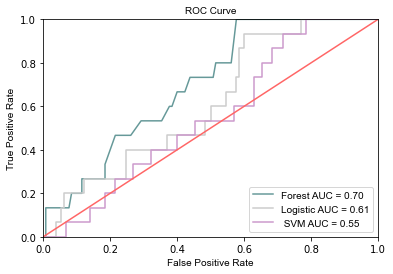

In [18]:
import matplotlib.pyplot as plt
plt.title('ROC Curve',family='Arial',fontsize=10)
plt.plot(forest_fprs,forest_tprs, '#669999', label='Forest AUC = %0.2f' % forest_roc_auc)  # 随机森林
plt.plot(lrfprs,lrtprs, '#CCCCCC', label='Logistic AUC = %0.2f' % lrroc_auc)  # 逻辑回归
plt.plot(svcfprs,svctprs, '#CC99CC', label=' SVM AUC = %0.2f' %svcroc_auc)  # 支持向量机
plt.legend(loc='lower right',fontsize=10,prop='Arial')
plt.plot([0, 1], [0, 1], '#FF6666')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',family='Arial',size=10)
plt.xlabel('False Positive Rate',family='Arial',size=10)
plt.savefig(r'三种机器学习模型ROC曲线.pdf')
plt.show()

四种评估指标

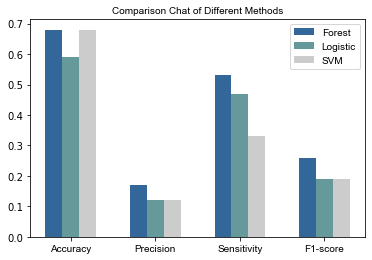

In [28]:
names = ('Accuracy', 'Precision', 'Sensitivity','F1-score')

forest = [0.68,0.17,0.53,0.26]
logistic=[0.59,0.12,0.47,0.19]
svm=[0.68, 0.12,0.33,0.19]

bar_width = 0.25  # 条形宽度
index_ACC = [1.25,2.5,3.75,5.0]
index_Pre = [1.5,2.75,4.0,5.25]
index_Sn = [1.75,3.0,4.25,5.5]
index_MCC = [2.0,3.25,4.5,5.75]
plt.title('Comparison Chat of Different Methods',family='Arial',fontsize=10)
plt.bar(index_ACC, height=forest, width=bar_width, color='#336699', label='Forest')
plt.bar(index_Pre, height=logistic, width=bar_width, color='#669999', label='Logistic')
plt.bar(index_Sn, height=svm, width=bar_width, color='#CCCCCC', label='SVM')

plt.legend(loc='best',fontsize=8,prop='Arial') # 显示图例
plt.xticks(index_Pre, names,size=10,family='Arial')  # 让横坐标轴刻度显示names， index_AUC + bar_width/2 为横坐标轴刻度的位置
#plt.title('对比图') # 图形标题
plt.savefig('四种评估方法的对比图.pdf')
plt.show()

单个组学预测

miRNA

In [54]:
#mi = pd.read_csv(r'miRNA.csv',header=0,index_col = 0)
mix = data1.iloc[:,1:1882]
miy = data1.iloc[:,0]
print(mix.shape)
miy.value_counts() 

(483, 1881)


0    432
1     51
Name: label, dtype: int64

In [55]:
mixtrain,  mixtest, miytrain, miytest = train_test_split(mix, miy, test_size=0.3, stratify=miy,random_state=18)
mixtrain.shape

(338, 1881)

In [56]:
dict= {}
list = []
for i in range(len(mixtrain)):
    miy = miytrain
    mix = mixtrain.iloc[:,i:i+1]
    miX = sm.add_constant(mix)
    model = sm.OLS(miy, miX).fit()
    #print(model.summary())
    P = model.f_pvalue
    mifea = mix.columns.tolist()
    if P <= 0.25:
        dict[mifea[0]] = P
        list.append(mifea[0])

midf = mixtrain[list]
miy1 = miytrain
miX = sm.add_constant(midf)
model2 = sm.OLS(miy1, miX).fit()
print(model2.summary())
print(model2.pvalues)
list2=[]
for i in range(1,len(model2.pvalues)):
    if model2.pvalues[i] <= 0.05:
        list2.append(model2.pvalues.index.tolist()[i])
print(len(list2))
mixtrain = mixtrain[list2]
mixtest = mixtest[list2]
print(mixtrain.shape)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     2.893
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.06e-09
Time:                        18:27:35   Log-Likelihood:                 5.4075
No. Observations:                 338   AIC:                             119.2
Df Residuals:                     273   BIC:                             367.7
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2028      0.098      2.

In [57]:
# 下采样
rus=RandomUnderSampler(sampling_strategy=1,random_state=18)
mixtrain,miytrain=rus.fit_resample(mixtrain,miytrain)
print('下采样后的数据集：')
print(sorted(Counter(miytrain).items()))
print(mixtrain.shape)

下采样后的数据集：
[(0, 36), (1, 36)]
(72, 15)


In [64]:
# 预测结果
miforest = RandomForestClassifier(criterion='entropy',n_estimators=171,random_state=337)
miforest.fit(mixtrain, miytrain)
miforest_y_predict = miforest.predict(mixtest)
pri_value = pd.DataFrame(miforest_y_predict)
miytest.to_csv('label_y.csv')
print('ytest',miytest)
print('y_predict',pri_value)
pri_value.to_csv('label_yy.csv')

ytest ID
TCGA-A8-A07S    0
TCGA-E9-A5UP    0
TCGA-AO-A03T    0
TCGA-E2-A15I    0
TCGA-EW-A6S9    0
               ..
TCGA-LL-A6FR    0
TCGA-OL-A5D7    0
TCGA-A7-A0CG    0
TCGA-AR-A255    0
TCGA-E9-A3Q9    0
Name: label, Length: 145, dtype: int64
y_predict      0
0    0
1    0
2    0
3    0
4    0
..  ..
140  0
141  0
142  0
143  1
144  1

[145 rows x 1 columns]


In [13]:
miforest = RandomForestClassifier(criterion='entropy',n_estimators=171,random_state=337)
miforest.fit(mixtrain, miytrain)
miforest_y_pred = miforest.predict_proba(mixtest)[:, 1]
miforest_y_predict = miforest.predict(mixtest)
miforest_matrix = confusion_matrix(miytest,miforest_y_predict)
print('混淆矩阵：\n',miforest_matrix)
miforest_fprs,miforest_tprs,miforest_thresholds = roc_curve(miytest,miforest_y_pred)
miforest_roc_auc = auc(miforest_fprs, miforest_tprs)
print(miforest_roc_auc)
miforest_acc = accuracy_score(miytest, miforest_y_predict)
miforest_pre =precision_score(miytest, miforest_y_predict)
miforest_recall =recall_score(miytest, miforest_y_predict)
miforest_f1 =f1_score(miytest, miforest_y_predict)
miforest_acc,miforest_pre,miforest_recall,miforest_f1

混淆矩阵：
 [[91 39]
 [ 7  8]]
0.7012820512820512


(0.6827586206896552,
 0.1702127659574468,
 0.5333333333333333,
 0.25806451612903225)

lncRNA

In [14]:
#lnc = pd.read_csv(r'lncRNA.csv',header=0,index_col = 0)
lncx = data1.iloc[:,62365:69680]
lncy =data1.iloc[:,0]
print(lncx.shape)
lncy.value_counts() 

(483, 7315)


0    432
1     51
Name: label, dtype: int64

In [15]:
lncxtrain,  lncxtest,lncytrain, lncytest = train_test_split(lncx, lncy, test_size=0.3, stratify=lncy,random_state=18)
lncxtrain.shape

(338, 7315)

In [16]:
dict= {}
list = []
for i in range(len(lncxtrain)):
    lncy = lncytrain
    lncx = lncxtrain.iloc[:,i:i+1]
    lncX = sm.add_constant(lncx)
    model = sm.OLS(lncy, lncX).fit()
    #print(model.summary())
    P = model.f_pvalue
    lncfea = lncx.columns.tolist()
    if P <= 0.25:
        dict[lncfea[0]] = P
        list.append(lncfea[0])

lncdf = lncxtrain[list]
lncy1 = lncytrain
lncX = sm.add_constant(lncdf)
model2 = sm.OLS(lncy1, lncX).fit()
print(model2.summary())
print(model2.pvalues)
list2=[]
for i in range(1,len(model2.pvalues)):
    if model2.pvalues[i] <= 0.05:
        list2.append(model2.pvalues.index.tolist()[i])
print(len(list2))
lncxtrain = lncxtrain[list2]
lncxtest = lncxtest[list2]
print(lncxtrain.shape)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     2.837
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.01e-09
Time:                        18:03:49   Log-Likelihood:                 10.581
No. Observations:                 338   AIC:                             118.8
Df Residuals:                     268   BIC:                             386.5
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1294      0.073     

In [17]:
# 下采样
rus=RandomUnderSampler(sampling_strategy=1,random_state=18)
lncxtrain,lncytrain=rus.fit_resample(lncxtrain,lncytrain)
print('下采样后的数据集：')
print(sorted(Counter(lncytrain).items()))
print(lncxtrain.shape)

下采样后的数据集：
[(0, 36), (1, 36)]
(72, 8)


In [18]:
lncforest = RandomForestClassifier(criterion='entropy',n_estimators=171,random_state=18)
lncforest.fit(lncxtrain, lncytrain)
lncforest_y_pred = lncforest.predict_proba(lncxtest)[:, 1]
lncforest_y_predict = lncforest.predict(lncxtest)
lncforest_matrix = confusion_matrix(lncytest,lncforest_y_predict)
print('混淆矩阵：\n',lncforest_matrix)
lncforest_fprs,lncforest_tprs,lncforest_thresholds = roc_curve(lncytest,lncforest_y_pred)
lncforest_roc_auc = auc(lncforest_fprs, lncforest_tprs)
print(lncforest_roc_auc)
lncforest_acc = accuracy_score(lncytest, lncforest_y_predict)
lncforest_pre =precision_score(lncytest, lncforest_y_predict)
lncforest_recall =recall_score(lncytest, lncforest_y_predict)
lncforest_f1 =f1_score(lncytest, lncforest_y_predict)
lncforest_acc,lncforest_pre,lncforest_recall,lncforest_f1

混淆矩阵：
 [[73 57]
 [ 7  8]]
0.566923076923077


(0.5586206896551724, 0.12307692307692308, 0.5333333333333333, 0.2)

mRNA

In [34]:
m = pd.read_csv(r'mRNA.csv',header=0,index_col = 0)
mx = data1.iloc[:,69680:]
my = data1.iloc[:,0]
print(mx.shape)
my.value_counts() 

(483, 56602)


0    432
1     51
Name: label, dtype: int64

In [35]:
mxtrain,  mxtest, mytrain, mytest = train_test_split(mx, my, test_size=0.3, stratify=my)
mxtrain.shape

(338, 56602)

In [36]:
dict= {}
list = []
for i in range(len(mxtrain)):
    my = mytrain
    mx = mxtrain.iloc[:,i:i+1]
    mX = sm.add_constant(mx)
    model = sm.OLS(my, mX).fit()
    #print(model.summary())
    P = model.f_pvalue
    mfea = mx.columns.tolist()
    if P <= 0.25:
        dict[mfea[0]] = P
        list.append(mfea[0])

mdf = mxtrain[list]
my1 = mytrain
mX = sm.add_constant(mdf)
model2 = sm.OLS(my1, mX).fit()
print(model2.summary())
print(model2.pvalues)
list2=[]
for i in range(1,len(model2.pvalues)):
    if model2.pvalues[i] <= 0.1:
        list2.append(model2.pvalues.index.tolist()[i])
print(len(list2))
mxtrain = mxtrain[list2]
mxtest = mxtest[list2]
print(mxtrain.shape)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.293
Date:                Fri, 21 Jan 2022   Prob (F-statistic):             0.0639
Time:                        18:10:32   Log-Likelihood:                -17.680
No. Observations:                 338   AIC:                             215.4
Df Residuals:                     248   BIC:                             559.4
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0302      0.250      0.121      0.9

In [37]:
# 下采样
rus=RandomUnderSampler(sampling_strategy=1)
mxtrain,mytrain=rus.fit_resample(mxtrain,mytrain)
print('下采样后的数据集：')
print(sorted(Counter(mytrain).items()))
print(mxtrain.shape)

下采样后的数据集：
[(0, 36), (1, 36)]
(72, 7)


In [38]:
mforest = RandomForestClassifier(criterion='entropy',n_estimators=171,random_state=13)
mforest.fit(mxtrain, mytrain)
mforest_y_pred = mforest.predict_proba(mxtest)[:, 1]
mforest_y_predict = mforest.predict(mxtest)
mforest_matrix = confusion_matrix(mytest,mforest_y_predict)
print('混淆矩阵：\n',mforest_matrix)
mforest_fprs,mforest_tprs,mforest_thresholds = roc_curve(mytest,mforest_y_pred)
mforest_roc_auc = auc(mforest_fprs, mforest_tprs)
print(mforest_roc_auc)
mforest_acc = accuracy_score(mytest, mforest_y_predict)
mforest_pre =precision_score(mytest, mforest_y_predict)
mforest_recall =recall_score(mytest, mforest_y_predict)
mforest_f1 =f1_score(mytest, mforest_y_predict)
mforest_acc,mforest_pre,mforest_recall,mforest_f1

混淆矩阵：
 [[51 79]
 [ 6  9]]
0.5461538461538461


(0.41379310344827586, 0.10227272727272728, 0.6, 0.17475728155339806)

cnv

In [39]:
#cnv = pd.read_csv(r'cnv.csv',header=0,index_col = 0)
cnvx = data1.iloc[:,1882:62365]
cnvy = data1.iloc[:,0]
print(cnvx.shape)
cnvy.value_counts() 

(483, 60483)


0    432
1     51
Name: label, dtype: int64

In [40]:
cnvxtrain,  cnvxtest, cnvytrain, cnvytest = train_test_split(cnvx, cnvy, test_size=0.3, stratify=cnvy,random_state=18)
cnvxtrain.shape

(338, 60483)

In [41]:
dict= {}
list = []
for i in range(len(cnvxtrain)):
    cnvy = cnvytrain
    cnvx = cnvxtrain.iloc[:,i:i+1]
    cnvX = sm.add_constant(cnvx)
    model = sm.OLS(cnvy, cnvX).fit()
    #print(model.summary())
    P = model.f_pvalue
    cnvfea = cnvx.columns.tolist()
    if P <= 0.3:
        dict[cnvfea[0]] = P
        list.append(cnvfea[0])

cnvdf = cnvxtrain[list]
cnvy1 = cnvytrain
cnvX = sm.add_constant(cnvdf)
model2 = sm.OLS(cnvy1, cnvX).fit()
print(model2.summary())
print(model2.pvalues)
list2=[]
for i in range(1,len(model2.pvalues)):
    if model2.pvalues[i] <= 0.2:
        list2.append(model2.pvalues.index.tolist()[i])
print(len(list2))
cnvxtrain = cnvxtrain[list2]
cnvxtest = cnvxtest[list2]
print(cnvxtrain.shape)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.5253
Date:                Fri, 21 Jan 2022   Prob (F-statistic):              0.933
Time:                        18:11:09   Log-Likelihood:                -77.721
No. Observations:                 338   AIC:                             189.4
Df Residuals:                     321   BIC:                             254.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [42]:
# 下采样
rus=RandomUnderSampler(sampling_strategy=1,random_state=18)
cnvxtrain,cnvytrain=rus.fit_resample(cnvxtrain,cnvytrain)
print('下采样后的数据集：')
print(sorted(Counter(cnvytrain).items()))
print(cnvxtrain.shape)

下采样后的数据集：
[(0, 36), (1, 36)]
(72, 2)


In [43]:
cnvforest = RandomForestClassifier(criterion='entropy',n_estimators=171,random_state=187)
cnvforest.fit(cnvxtrain, cnvytrain)
cnvforest_y_pred = cnvforest.predict_proba(cnvxtest)[:, 1]
cnvforest_y_predict = cnvforest.predict(cnvxtest)
cnvforest_matrix = confusion_matrix(cnvytest,cnvforest_y_predict)
print('混淆矩阵：\n',cnvforest_matrix)
cnvforest_fprs,cnvforest_tprs,cnvforest_thresholds = roc_curve(cnvytest,cnvforest_y_pred)
cnvforest_roc_auc = auc(cnvforest_fprs, cnvforest_tprs)
print(cnvforest_roc_auc)
cnvforest_acc = accuracy_score(cnvytest, cnvforest_y_predict)
cnvforest_pre =precision_score(cnvytest, cnvforest_y_predict)
cnvforest_recall =recall_score(cnvytest, cnvforest_y_predict)
cnvforest_f1 =f1_score(cnvytest, cnvforest_y_predict)
cnvforest_acc,cnvforest_pre,cnvforest_recall,cnvforest_f1

混淆矩阵：
 [[64 66]
 [ 8  7]]
0.5207692307692308


(0.4896551724137931,
 0.0958904109589041,
 0.4666666666666667,
 0.15909090909090906)

miRNA与其他组学对比图

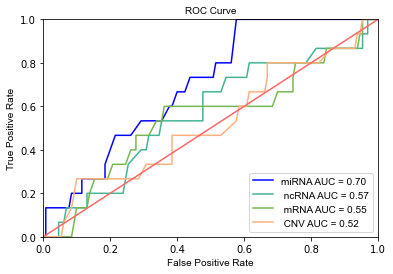

In [45]:
import matplotlib.pyplot as plt
plt.title('ROC Curve',family='Arial',fontsize=10)
plt.plot(miforest_fprs,miforest_tprs, 'b', label='miRNA AUC = %0.2f' %miforest_roc_auc)  # miRNA
plt.plot(lncforest_fprs,lncforest_tprs, '#42b395', label=' ncRNA AUC = %0.2f' %lncforest_roc_auc)  # lncRNA
plt.plot(mforest_fprs,mforest_tprs, '#75b84f', label=' mRNA AUC = %0.2f' %mforest_roc_auc)  # mRNA
plt.plot(cnvforest_fprs,cnvforest_tprs, '#ffb07c', label=' CNV AUC = %0.2f' %cnvforest_roc_auc)  # CNV
plt.legend(loc='lower right',fontsize=10,prop='Arial')
plt.plot([0, 1], [0, 1], '#FF6666')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',family='Arial',size=10)
plt.xlabel('False Positive Rate',family='Arial',size=10)
plt.savefig(r'miRNA与单一数据对比图.pdf')
plt.show()

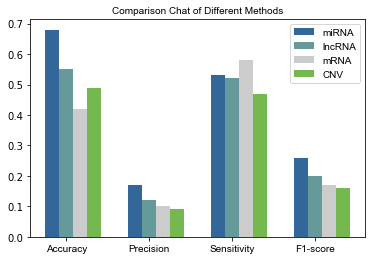

In [53]:
names = ('Accuracy', 'Precision', 'Sensitivity','F1-score')


mi=[0.68,0.17,0.53,0.26]
lnc=[0.55, 0.12, 0.52, 0.2]
m=[0.42, 0.1, 0.58, 0.17]
svc=[0.49,0.09,0.47,0.16]

bar_width = 0.25  # 条形宽度
index_ACC = [1.25, 2.75, 4.25, 5.75]
index_Pre = [1.5, 3.0, 4.5, 6.0]
index_Sn = [1.75, 3.25, 4.75, 6.25]
index_MCC = [2.0, 3.5, 5.0, 6.5]


plt.title('Comparison Chat of Different Methods',family='Arial',fontsize=10)
plt.bar(index_ACC, height=mi, width=bar_width, color='#336699', label='miRNA')
plt.bar(index_Pre, height=lnc, width=bar_width, color='#669999', label='lncRNA')
plt.bar(index_Sn, height=m, width=bar_width, color='#CCCCCC', label='mRNA')
plt.bar(index_MCC, height=svc, width=bar_width, color='#75b84f', label='CNV')

plt.legend(loc='best',fontsize=8,prop='Arial') # 显示图例
plt.xticks(index_Pre, names,size=10,family='Arial')  # 让横坐标轴刻度显示names， index_AUC + bar_width/2 为横坐标轴刻度的位置
#plt.title('对比图') # 图形标题
plt.savefig('miRNA与单一数据的树形图.pdf')
plt.show()

多维数据与其他组学对比图

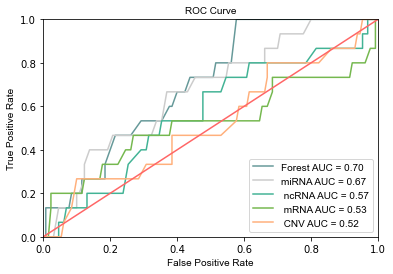

In [177]:
import matplotlib.pyplot as plt
plt.title('ROC Curve',family='Arial',fontsize=10)
plt.plot(forest_fprs,forest_tprs, '#669999', label='Forest AUC = %0.2f' % forest_roc_auc)  # 多维
plt.plot(miforest_fprs,miforest_tprs, '#CCCCCC', label='miRNA AUC = %0.2f' %miforest_roc_auc)  # miRNA
plt.plot(lncforest_fprs,lncforest_tprs, '#42b395', label=' ncRNA AUC = %0.2f' %lncforest_roc_auc)  # lncRNA
plt.plot(mforest_fprs,mforest_tprs, '#75b84f', label=' mRNA AUC = %0.2f' %mforest_roc_auc)  # mRNA
plt.plot(cnvforest_fprs,cnvforest_tprs, '#ffb07c', label=' CNV AUC = %0.2f' %cnvforest_roc_auc)  # CNV
plt.legend(loc='lower right',fontsize=10,prop='Arial')
plt.plot([0, 1], [0, 1], '#FF6666')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',family='Arial',size=10)
plt.xlabel('False Positive Rate',family='Arial',size=10)
plt.savefig(r'多维数据与单一数据对比图.pdf')
plt.show()

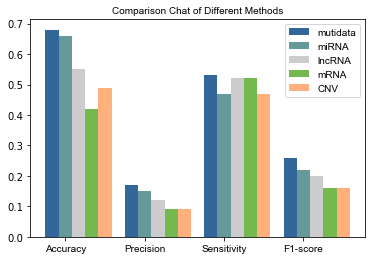

In [174]:
names = ('Accuracy', 'Precision', 'Sensitivity','F1-score')

forest = [0.68,0.17,0.53,0.26]
mi=[0.66,0.15,0.47,0.22]
lnc=[0.55, 0.12, 0.52, 0.2]
m=[0.42, 0.09, 0.52, 0.16]
svc=[0.49,0.09,0.47,0.16]

bar_width = 0.25  # 条形宽度
index_ACC = [1.25, 2.75, 4.25, 5.75]
index_Pre = [1.5, 3.0, 4.5, 6.0]
index_Sn = [1.75, 3.25, 4.75, 6.25]
index_MCC = [2.0, 3.5, 5.0, 6.5]
index_f = [2.25, 3.75, 5.25, 6.75]

plt.title('Comparison Chat of Different Methods',family='Arial',fontsize=10)
plt.bar(index_ACC, height=forest, width=bar_width, color='#336699', label='mutidata')
plt.bar(index_Pre, height=mi, width=bar_width, color='#669999', label='miRNA')
plt.bar(index_Sn, height=lnc, width=bar_width, color='#CCCCCC', label='lncRNA')
plt.bar(index_MCC, height=m, width=bar_width, color='#75b84f', label='mRNA')
plt.bar(index_f, height=svc, width=bar_width, color='#ffb07c', label='CNV')

plt.legend(loc='best',fontsize=8,prop='Arial') # 显示图例
plt.xticks(index_Pre, names,size=10,family='Arial')  # 让横坐标轴刻度显示names， index_AUC + bar_width/2 为横坐标轴刻度的位置
#plt.title('对比图') # 图形标题
plt.savefig('五种数据的四种评估方法的对比图.pdf')
plt.show()